# Books Dataset

In [1]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
book = pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm

In [6]:
frequent_books = apriori(book, min_support=0.15,use_colnames=True)
frequent_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [7]:
rules = association_rules(frequent_books,metric='lift',min_threshold=0.)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [8]:
rule_unred = rules.sort_values('lift',ascending=False)[0:20].head(10)

In [9]:
rule_unred

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


In [10]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


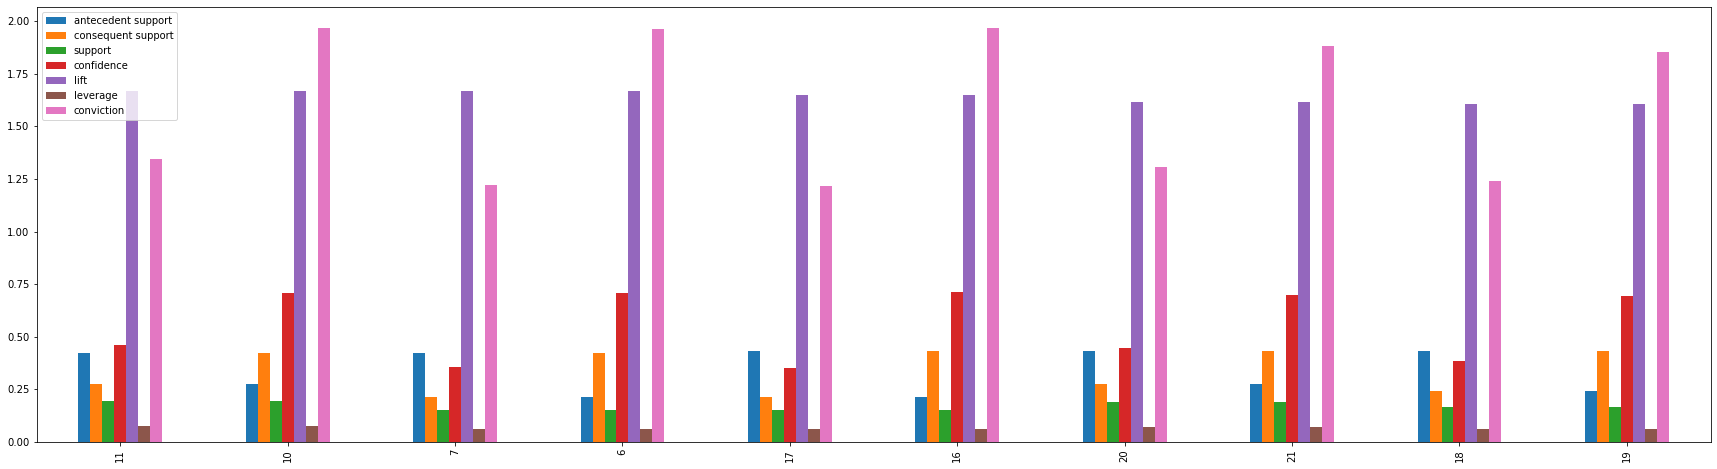

In [11]:
plot = rule_unred.plot.bar(figsize=(30,8))

In [12]:
def to_list(i):
    return(sorted(list(i)))

In [13]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [14]:
ma_X

0     [YouthBks, ChildBks]
1     [ChildBks, YouthBks]
2      [CookBks, ChildBks]
3      [ChildBks, CookBks]
4     [ChildBks, DoItYBks]
5     [DoItYBks, ChildBks]
6       [RefBks, ChildBks]
7       [ChildBks, RefBks]
8       [ArtBks, ChildBks]
9       [ChildBks, ArtBks]
10     [GeogBks, ChildBks]
11     [ChildBks, GeogBks]
12     [YouthBks, CookBks]
13     [CookBks, YouthBks]
14     [CookBks, DoItYBks]
15     [DoItYBks, CookBks]
16       [RefBks, CookBks]
17       [CookBks, RefBks]
18       [CookBks, ArtBks]
19       [ArtBks, CookBks]
20      [CookBks, GeogBks]
21      [GeogBks, CookBks]
dtype: object

In [15]:
ma_X = ma_X.apply(sorted)
ma_X

0     [ChildBks, YouthBks]
1     [ChildBks, YouthBks]
2      [ChildBks, CookBks]
3      [ChildBks, CookBks]
4     [ChildBks, DoItYBks]
5     [ChildBks, DoItYBks]
6       [ChildBks, RefBks]
7       [ChildBks, RefBks]
8       [ArtBks, ChildBks]
9       [ArtBks, ChildBks]
10     [ChildBks, GeogBks]
11     [ChildBks, GeogBks]
12     [CookBks, YouthBks]
13     [CookBks, YouthBks]
14     [CookBks, DoItYBks]
15     [CookBks, DoItYBks]
16       [CookBks, RefBks]
17       [CookBks, RefBks]
18       [ArtBks, CookBks]
19       [ArtBks, CookBks]
20      [CookBks, GeogBks]
21      [CookBks, GeogBks]
dtype: object

In [16]:
rules_sets = list(ma_X)
rules_sets

[['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks']]

In [17]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
    
unique_rules_sets

[['CookBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['CookBks', 'RefBks'],
 ['ArtBks', 'CookBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'DoItYBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'DoItYBks']]

In [18]:
#getting rules without any redundancy
rules_no_redundancy = rules.iloc[index_rules,:]


In [19]:
#sorting them w.r.t.  list and getting top 10 rules
rule_book = rules_no_redundancy.sort_values('lift',ascending=False).head(10)

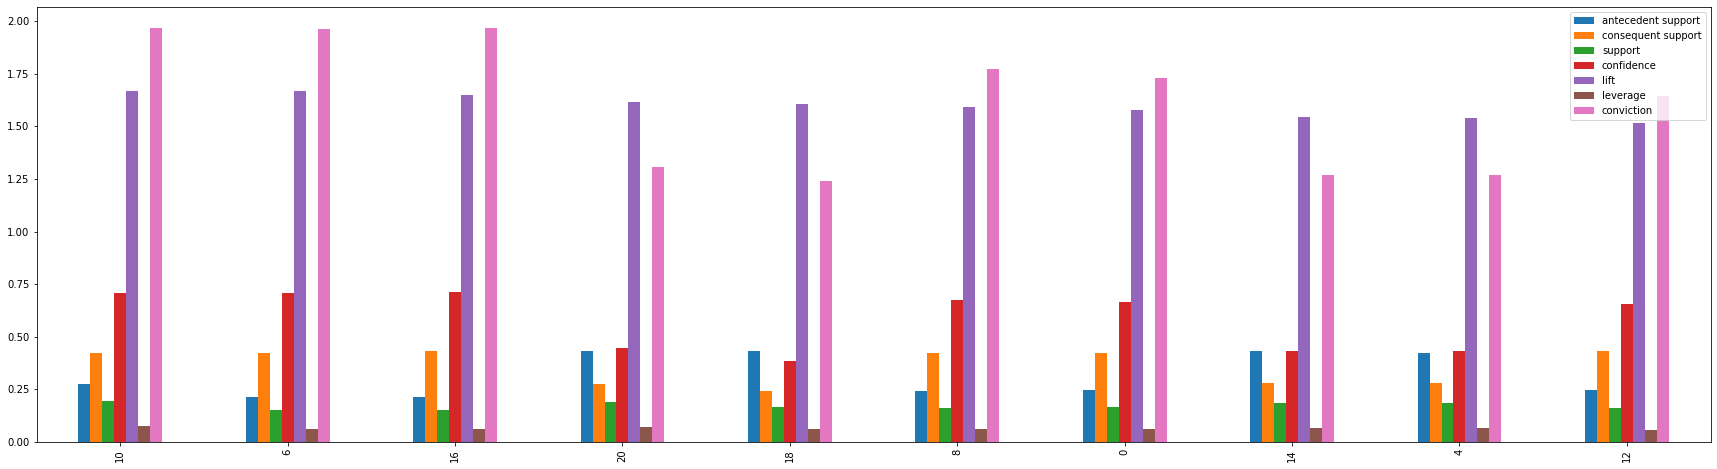

In [20]:
ax = rule_book.plot.bar(figsize=(30,8))

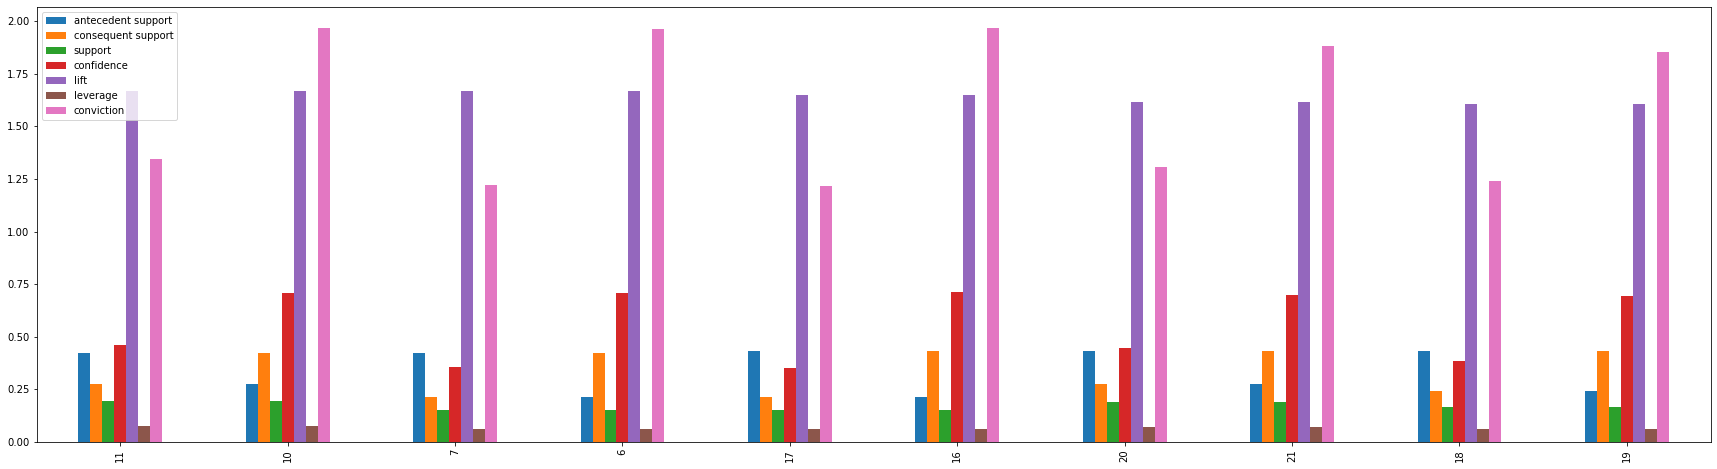

In [21]:
ax = rule_unred.plot.bar(figsize=(30,8))